# Super Store Data Analysis

In [1]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import json 
import folium

%matplotlib inline
import warnings #Ignore the warnings
warnings.filterwarnings('ignore')

#!conda install -c conda-forge folium=0.5.0 --yes

# Preparing Dataset and Overview

In [2]:
#https://data.world/annjackson/2019-superstore
month_no=0
year_no=0

df_store = pd.read_csv("Superstore_2019.csv")
df_store['Order Date'] = pd.to_datetime(df_store['Order Date'])  

year_range=list(df_store['Order Date'].dt.year.unique())
print(year_range)
year_no=int(input("Enter the year number from the year list to generate Annual Report: "))
if year_no in year_range:
    df_store = df_store[df_store['Order Date'].dt.year == year_no]

month_range=list(df_store['Order Date'].dt.month.unique())
print(month_range)
month_no=int(input("Enter the month number from the month list to generate Monthly Report or Enter 0 to get Annual Report:"))

if month_no in month_range:
    df_store = df_store[df_store['Order Date'].dt.month == month_no]
    
df_store = df_store.drop(["Number of Records","Postal Code"], axis=1, inplace=False)
df_store['Total Cost']=(df_store['Sales']-df_store['Profit'])
df_store

[2017, 2016, 2015, 2018]
Enter the year number from the year list to generate Annual Report: 2017
[11, 6, 12, 1, 7, 3, 9, 4, 8, 10, 5, 2]
Enter the month number from the month list to generate Monthly Report or Enter 0 to get Annual Report:0


,Category,City,Country,Customer Name,Discount,Order Date,Order ID,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category,Total Cost
0,Furniture,Henderson,United States,Claire Gute,0.0,2017-11-08,CA-2017-152156,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.960,Consumer,11/11/2017,Second Class,Kentucky,Bookcases,220.0464
1,Furniture,Henderson,United States,Claire Gute,0.0,2017-11-08,CA-2017-152156,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.940,Consumer,11/11/2017,Second Class,Kentucky,Chairs,512.3580
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.0,2017-06-12,CA-2017-138688,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.620,Corporate,6/16/2017,Second Class,California,Labels,7.7486
13,Office Supplies,Seattle,United States,Irene Maddox,0.2,2017-12-05,CA-2017-161389,Fellowes,Fellowes PB200 Plastic Comb Binding Machine,132.5922,3,West,407.976,Consumer,12/10/2017,Standard Class,Washington,Binders,275.3838
21,Office Supplies,Fremont,United States,Ken Black,0.0,2017-12-09,CA-2017-137330,Newell,Newell 318,5.0596,7,Central,19.460,Corporate,12/13/2017,Standard Class,Nebraska,Art,14.4004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,Technology,Seattle,United States,Sanjit Jacobs,0.2,2017-09-17,CA-2017-159730,Other,Clarity 53712,7.9188,2,West,105.584,Home Office,9/21/2017,Standard Class,Washington,Phones,97.6652
9973,Technology,Los Angeles,United States,Barry Franz,0.2,2017-05-05,CA-2017-137729,Cisco,Cisco Small Business SPA 502G VoIP phone,21.5397,3,West,246.168,Home Office,5/9/2017,Standard Class,California,Phones,224.6283
9976,Technology,Santa Barbara,United States,Maria Etezadi,0.2,2017-06-06,CA-2017-160717,Other,Bose SoundLink Bluetooth Speaker,161.1900,3,West,477.600,Home Office,6/11/2017,Standard Class,California,Phones,316.4100
9983,Technology,Los Angeles,United States,Anne Pryor,0.2,2017-12-06,US-2017-103674,Avaya,Avaya 5410 Digital phone,27.1960,5,West,271.960,Home Office,12/10/2017,Standard Class,California,Phones,244.7640


In [3]:
df_store.describe()

,Discount,Profit,Quantity,Sales,Total Cost
count,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000
mean,0.154743,31.617771,3.802474,235.487282,203.869511
std,0.203643,280.780758,2.201917,668.217524,534.900955
min,0.000000,-6599.978000,1.000000,0.836000,0.840000
25%,0.000000,1.875600,2.000000,17.940000,13.163250
50%,0.200000,8.737200,3.000000,52.680000,40.050000
75%,0.200000,28.857600,5.000000,208.072000,180.299000
max,0.800000,8399.976000,14.000000,17499.950000,11099.963000


In [4]:
df_store.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Discount',
       'Order Date', 'Order ID', 'Manufacturer', 'Product Name', 'Profit',
       'Quantity', 'Region', 'Sales', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'Total Cost'],
      dtype='object')

In [5]:
rcParams['font.size'] = '18'
rcParams['figure.figsize'] = 11.7,8.27
output_dir="temp_image"

## Statistical Visualization of diffrent relationship

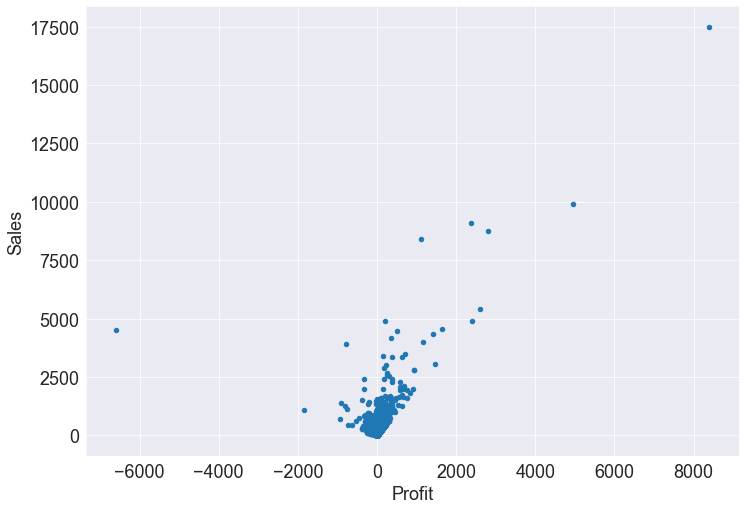

In [6]:
sns.set_style('darkgrid')
df_store.plot(y="Sales", x="Profit", kind="scatter")
plt.show()

In [7]:
df_store['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

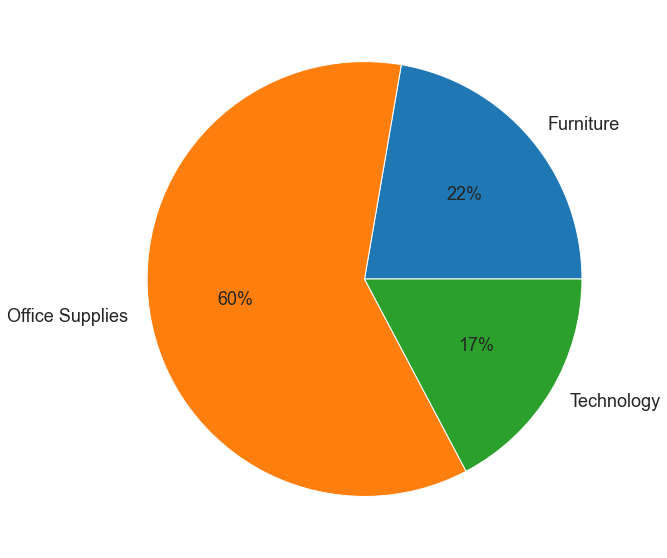

In [8]:
df_category_count = df_store.groupby(['Category'])['Quantity'].sum().reset_index(name='count') 
plt.figure(figsize=(10,10))
plt.pie(df_category_count['count'],labels=df_category_count['Category'],autopct='%1.0f%%')
category_plot_loc=str(output_dir+os.path.sep+"category.png")
plt.savefig(category_plot_loc,transparent=True)

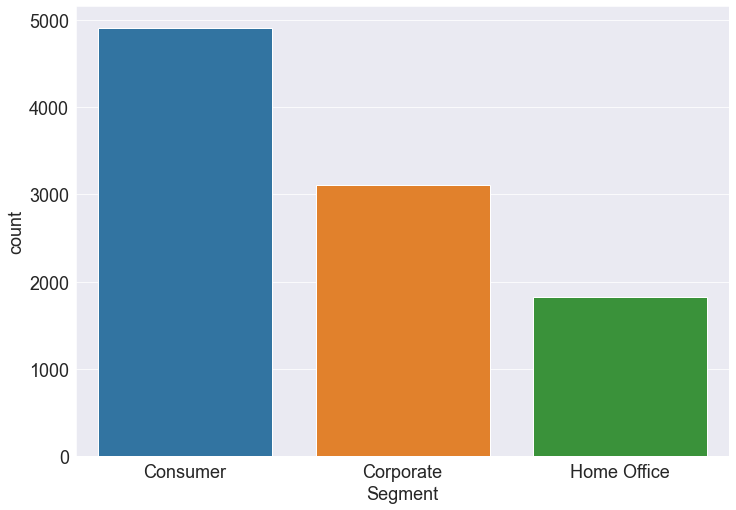

In [9]:
df_category_count = df_store.groupby(['Segment'])['Quantity'].sum().reset_index(name='count') 
sns.barplot(x="Segment",y="count", data=df_category_count)

consumer_plot_loc=str(output_dir+os.path.sep+"consumer.png")
plt.savefig(consumer_plot_loc,transparent=True)

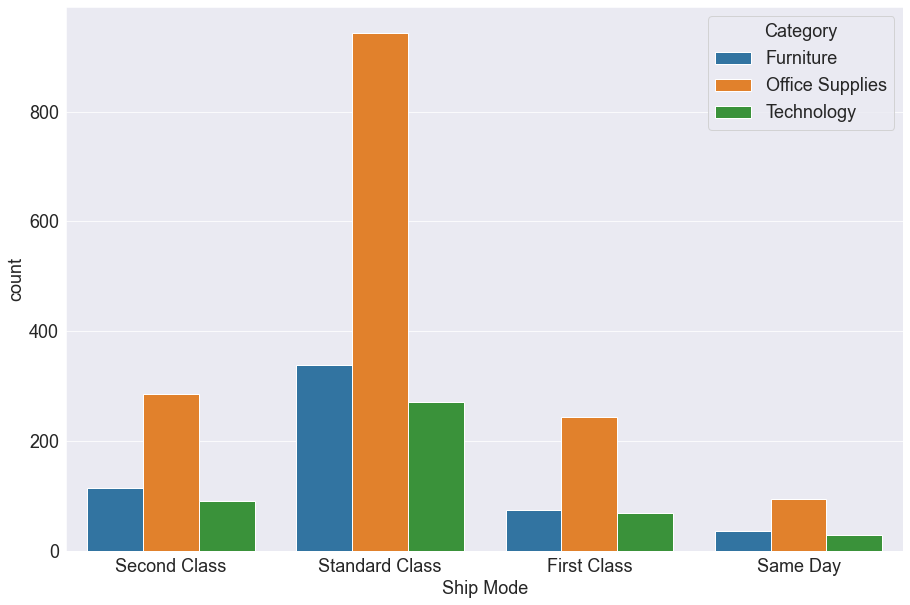

In [10]:
plt.figure(figsize = (15,10))
sns.countplot("Ship Mode",data=df_store,hue='Category')

shipping_mode=str(output_dir+os.path.sep+"shipping_mode.png")
plt.savefig(shipping_mode,transparent=True)

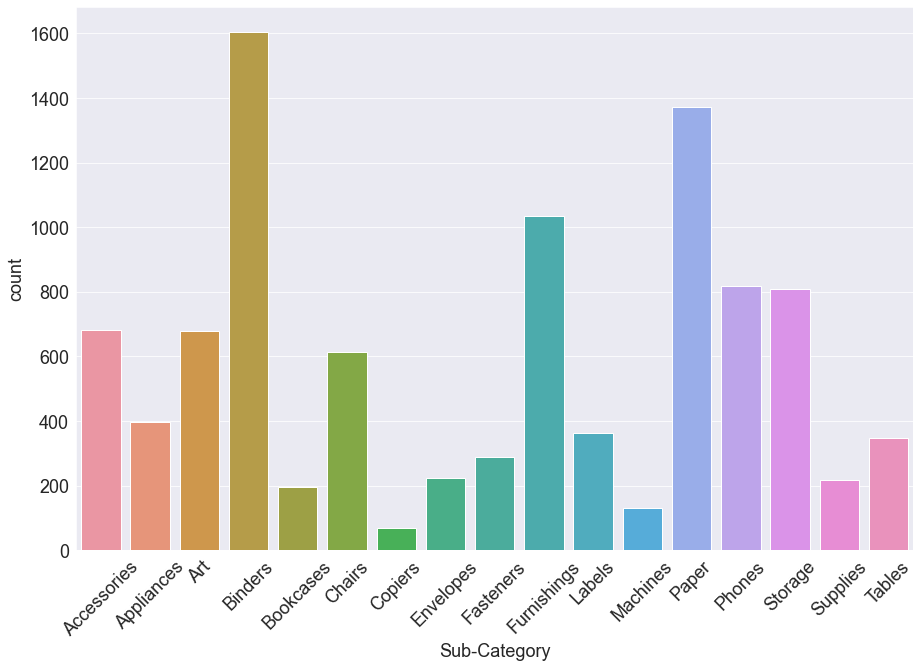

In [11]:
df_sub_category_count = df_store.groupby(['Sub-Category'])['Quantity'].sum().reset_index(name='count') 
plt.figure(figsize=(15,10))
sns.barplot(x="Sub-Category",y="count", data=df_sub_category_count)

sub_category_plot_loc=str(output_dir+os.path.sep+"sub_category.png")
plt.xticks(rotation=45)
plt.savefig(sub_category_plot_loc,transparent=True)
plt.show()

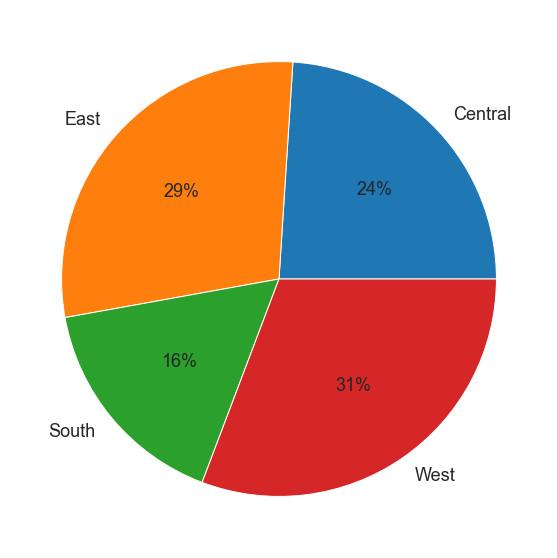

In [12]:
df_region_count = df_store.groupby(['Region'])['Quantity'].sum().reset_index(name='count') 
plt.figure(figsize=(10,10))
plt.pie(df_region_count['count'],labels=df_region_count['Region'],autopct='%1.0f%%')
region_plot_loc=str(output_dir+os.path.sep+"region.png")
plt.savefig(region_plot_loc,transparent=True)
plt.show()

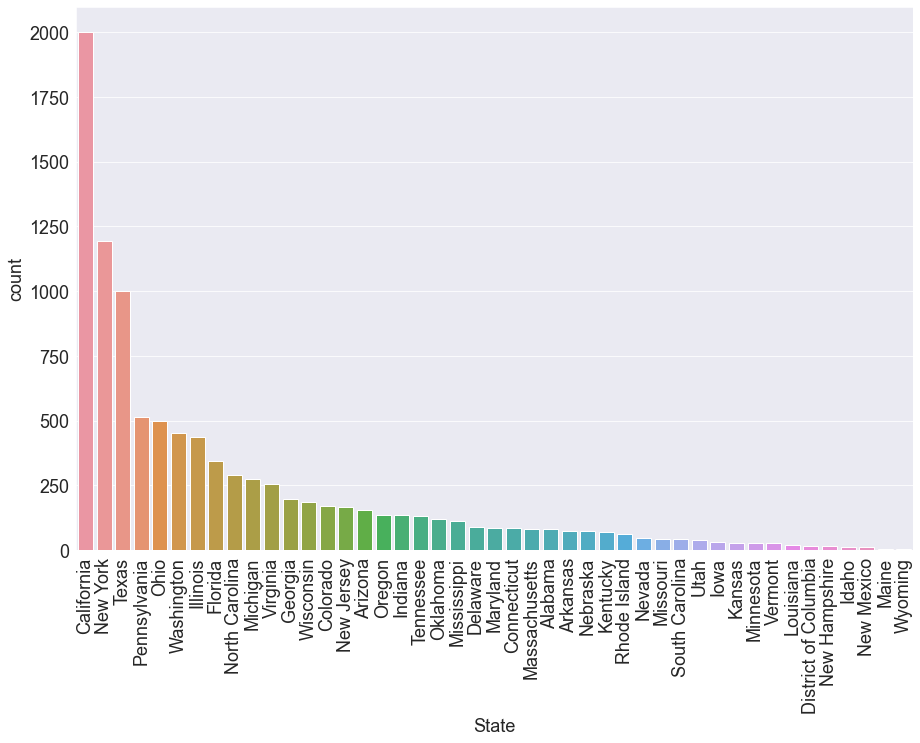

In [13]:
df_store_count = df_store.groupby(['State'])['Quantity'].sum().reset_index(name='count') 
df_store_count = df_store_count.sort_values('count',ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x="State",y="count", data=df_store_count)

file_loc=str(output_dir+os.path.sep+"states.png")
plt.savefig(file_loc,transparent=True)
plt.xticks(rotation=90)
plt.show()

# Map Plot of State wise Sales Distribution

In [14]:
json_file = open('us-states.json') 
usa = json.load(json_file)

In [15]:
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
usa_map.choropleth(
    geo_data=usa,
    data=df_store_count,
    columns=['State', 'count'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales Distribution based on item in USA'
)

statewise_map_loc=str(output_dir+os.path.sep+"statewise_map.html")
usa_map.save(outfile= statewise_map_loc)
usa_map

# Correlation Data Points

In [16]:
correlation = df_store.corr()
correlation

,Discount,Profit,Quantity,Sales,Total Cost
Discount,1.000000,-0.183143,0.000900,-0.037962,0.048712
Profit,-0.183143,1.000000,0.098523,0.637539,0.271516
Quantity,0.000900,0.098523,1.000000,0.192794,0.189128
Sales,-0.037962,0.637539,0.192794,1.000000,0.914578
Total Cost,0.048712,0.271516,0.189128,0.914578,1.000000


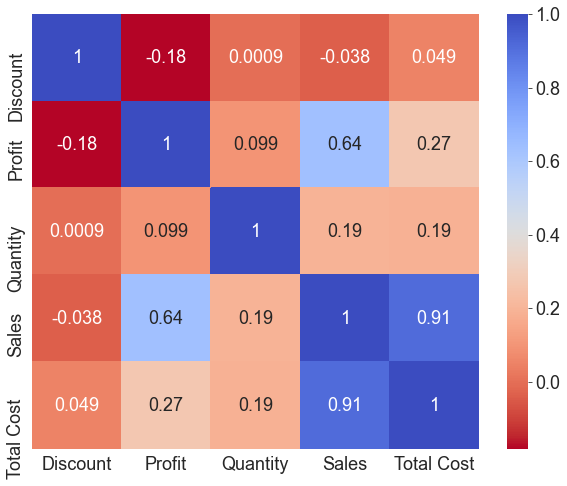

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation,annot=True,cmap='coolwarm_r')

heat_map_plot_loc=str(output_dir+os.path.sep+"heat_map.png")
plt.savefig(heat_map_plot_loc,transparent=True)

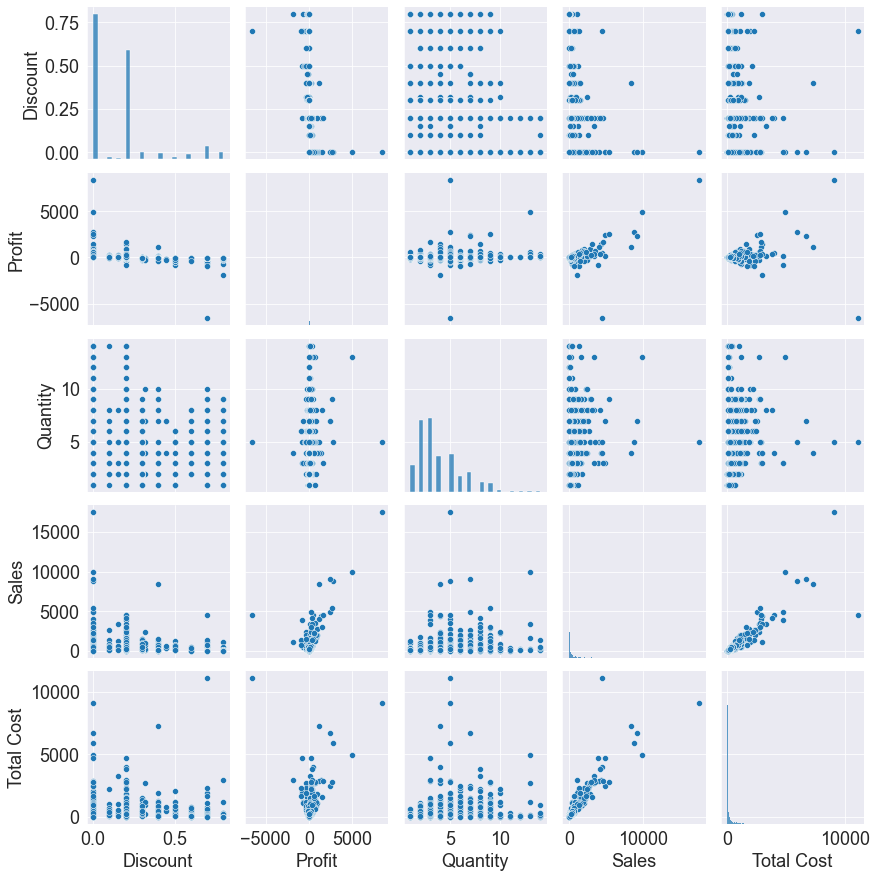

In [18]:
sns.pairplot(df_store)

pair_plot=str(output_dir+os.path.sep+"pair_plot.png")
plt.savefig(pair_plot,transparent=True)

# Highlight Statistics

### Top Sales Manufacturer

In [19]:
df_manufacturer_count = df_store.groupby(['Manufacturer'])['Quantity'].sum().reset_index(name='count') 
indexNames = df_manufacturer_count[ df_manufacturer_count['Manufacturer'] == "Other" ].index
df_manufacturer_count.drop(indexNames , inplace=True)

top_manufacturer=df_manufacturer_count.loc[df_manufacturer_count['count']==max(df_manufacturer_count['count'])]

top_manufacturer_count=top_manufacturer['count'].iloc[0]
top_manufacturer_name=top_manufacturer['Manufacturer'].iloc[0]
print(top_manufacturer_name, top_manufacturer_count)

Xerox 752


### Top / Bottom Profitable Manufacturer

In [20]:
df_manufacturer_profit = df_store.groupby(['Manufacturer'])['Profit'].sum().reset_index(name='total_profit') 

indexNames = df_manufacturer_profit[ df_manufacturer_profit['Manufacturer'] == "Other" ].index
df_manufacturer_profit.drop(indexNames , inplace=True)
    
top_manufacturer_profit=df_manufacturer_profit.loc[df_manufacturer_profit['total_profit']==max(df_manufacturer_profit['total_profit'])]
bottom_manufacturer_profit=df_manufacturer_profit.loc[df_manufacturer_profit['total_profit']==min(df_manufacturer_profit['total_profit'])]

bottom_manufacturer_profit_value=bottom_manufacturer_profit['total_profit'].iloc[0]
bottom_manufacturer_profit_name=bottom_manufacturer_profit['Manufacturer'].iloc[0]
print(bottom_manufacturer_profit_name, bottom_manufacturer_profit_value)

top_manufacturer_profit_value=top_manufacturer_profit['total_profit'].iloc[0]
top_manufacturer_profit_name=top_manufacturer_profit['Manufacturer'].iloc[0]
print(top_manufacturer_profit_name, top_manufacturer_profit_value)

Cubify -6599.978
Canon 12470.6877


### Top Product

In [21]:
df_product_count = df_store.groupby(['Product Name'])['Quantity'].sum().reset_index(name='count') 

indexNames = df_product_count[ df_product_count['Product Name'] == "Other" ].index
df_product_count.drop(indexNames , inplace=True)

top_product=df_product_count.loc[df_product_count['count']==max(df_product_count['count'])]


top_product_count=top_product['count'].iloc[0]
top_product_name=top_product['Product Name'].iloc[0]
print(top_product_name, top_product_count)

Staples 56


### Top / Bottom Profitable Product

In [22]:
df_product_profit = df_store.groupby(['Product Name'])['Profit'].sum().reset_index(name='total_profit') 

indexNames = df_product_profit[ df_product_profit['Product Name'] == "Other" ].index
df_product_profit.drop(indexNames , inplace=True)

top_product_profit=df_product_profit.loc[df_product_profit['total_profit']==max(df_product_profit['total_profit'])]
bottom_product=df_product_profit.loc[df_product_profit['total_profit']==min(df_product_profit['total_profit'])]

bottom_product_profit_value=bottom_product['total_profit'].iloc[0]
bottom_product_profit_name=bottom_product['Product Name'].iloc[0]
print(bottom_product_profit_name, bottom_product_profit_value)

top_product_profit_value=top_product_profit['total_profit'].iloc[0]
top_product_profit_name=top_product_profit['Product Name'].iloc[0]
print(top_product_profit_name, top_product_profit_value)

Cubify CubeX 3D Printer Double Head Print -6599.978
Canon imageCLASS 2200 Advanced Copier 9519.9728


### Overall Statistics

In [23]:
total_sales = df_store['Sales'].sum()
total_profit = df_store['Profit'].sum()
profit_percent=total_profit/total_sales*100
total_quantity = df_store['Quantity'].sum()
unique_customer = len(df_store['Customer Name'].unique())

profit_count=round(len(df_store[df_store['Profit']>=0])/len(df_store['Profit'])*100,2)

print(total_sales,total_profit,profit_percent,total_quantity,unique_customer,profit_count,sep="\n")

609205.598
81795.1743
13.426530315632457
9837
638
81.56


# HTML Report Integration

In [24]:
#presets and input_data
company_name="SRM DataX"
company_url="https://www.srmist.edu.in/"
company_logo_loc=output_dir+os.path.sep+'SRM_logo.png'
avatar1_loc=output_dir+os.path.sep+'avatar1.jpg'

### HTML Report Format

In [25]:

html_string = '''
<!DOCTYPE html>
<html>
<title>Sales Report</title>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
<style>
html,body,h1,h2,h3,h4,h5 {font-family: "Raleway", sans-serif}
</style>
<body class="w3-light-grey">

<!-- Top container -->
<div class="w3-bar w3-top w3-black w3-large" style="z-index:4">
  <button class="w3-bar-item w3-button w3-hide-large w3-hover-none w3-hover-text-light-grey" onclick="w3_open();"><i class="fa fa-bars"></i> Menu</button>
  <span class="w3-bar-item w3-right">DATA Xplorers</span>
</div>

<!-- Sidebar/menu -->
<nav class="w3-sidebar w3-collapse w3-white w3-animate-left" style="z-index:3;width:300px;" id="mySidebar"><br>
  <div class="w3-container w3-row">
    <div class="w3-col s4">
      <img src="'''+company_logo_loc+'''" class="w3-circle w3-margin-right" style="width:46px">
    </div>
    <div class="w3-col s8 w3-bar">
      <span>Welcome, <strong>'''+company_name+'''</strong></span><br>
    <a href="'''+company_url+'''" class="w3-bar-item w3-button"><i class="fa fa-user"></i></a>
    </div>
  </div>
  <hr>
  <div class="w3-container">
    <h5>Dashboard</h5>
  </div>
  <div class="w3-bar-block">
    <a href="#" class="w3-bar-item w3-button w3-padding-16 w3-hide-large w3-dark-grey w3-hover-black" onclick="w3_close()" title="close menu"><i class="fa fa-remove fa-fw"></i> Close Menu</a>
    <a href="#" class="w3-bar-item w3-button w3-padding w3-blue"><i class="fa fa-users fa-fw"></i> Overview</a>
    <a href="'''+statewise_map_loc+'''" class="w3-bar-item w3-button w3-padding"><i class="fa fa-eye fa-fw"></i> View Map</a>
    <a href="#" class="w3-bar-item w3-button w3-padding"><i class="fa fa-users fa-fw"></i> Traffic</a>
    <a href="#" class="w3-bar-item w3-button w3-padding"><i class="fa fa-bullseye fa-fw"></i> Geo</a>
    <a href="#" class="w3-bar-item w3-button w3-padding"><i class="fa fa-diamond fa-fw"></i> Orders</a>
    <a href="#" class="w3-bar-item w3-button w3-padding"><i class="fa fa-bell fa-fw"></i> News</a>
    <a href="#" class="w3-bar-item w3-button w3-padding"><i class="fa fa-bank fa-fw"></i> General</a>
    <a href="#" class="w3-bar-item w3-button w3-padding"><i class="fa fa-history fa-fw"></i> History</a>
    <a href="#" class="w3-bar-item w3-button w3-padding"><i class="fa fa-cog fa-fw"></i> Settings</a><br><br>
  </div>
</nav>


<!-- Overlay effect when opening sidebar on small screens -->
<div class="w3-overlay w3-hide-large w3-animate-opacity" onclick="w3_close()" style="cursor:pointer" title="close side menu" id="myOverlay"></div>

<!-- !PAGE CONTENT! -->
<div class="w3-main" style="margin-left:300px;margin-top:43px;">

  <!-- Header -->
  <header class="w3-container" style="padding-top:22px">
    <h5><b><i class="fa fa-dashboard"></i> My Dashboard</b></h5>
  </header>

  <div class="w3-row-padding w3-margin-bottom">
    <div class="w3-quarter">
      <div class="w3-container w3-red w3-padding-16">
        <div class="w3-left"><i class="fa fa-hashtag w3-xxxlarge"></i></div>
        <div class="w3-right">
          <h3>'''+str(total_quantity)+'''</h3>
        </div>
        <div class="w3-clear"></div>
        <h4>Quantity</h4>
      </div>
    </div>
    <div class="w3-quarter">
      <div class="w3-container w3-blue w3-padding-16">
        <div class="w3-left"><i class="fa fa-line-chart w3-xxxlarge"></i></div>
        <div class="w3-right">
          <h3>'''+str(int(profit_percent))+'''%</h3>
        </div>
        <div class="w3-clear"></div>
        <h4>Profit Percent</h4>
      </div>
    </div>
    <div class="w3-quarter">
      <div class="w3-container w3-teal w3-padding-16">
        <div class="w3-left"><i class="fa fa-money w3-xxxlarge"></i></div>
        <div class="w3-right">
          <h3>'''+str(int(total_sales))+'''</h3>
        </div>
        <div class="w3-clear"></div>
        <h4>Sales</h4>
      </div>
    </div>
    <div class="w3-quarter">
      <div class="w3-container w3-orange w3-text-white w3-padding-16">
        <div class="w3-left"><i class="fa fa-users w3-xxxlarge"></i></div>
        <div class="w3-right">
          <h3>'''+str(unique_customer)+'''</h3>
        </div>
        <div class="w3-clear"></div>
        <h4>Unique Customers</h4>
      </div>
    </div>
  </div>

  <div class="w3-panel">
    <div class="w3-row-padding" style="margin:0 -16px">
      <div class="w3-third">
        <h5>Top Category</h5>
        <img src="'''+category_plot_loc+'''" style="width:100%">
      </div>
      <div class="w3-twothird">
        <h5>Highlight</h5>
        <table class="w3-table w3-striped w3-white">
          <tr>
            <td><i class="fa fa-user w3-text-blue w3-large"></i></td>
            <td>Top Selling Brand</td>
            <td><i>'''+top_manufacturer_name+'''</i></td>
          </tr>
          <tr>
            <td><i class="fa fa-bell w3-text-red w3-large"></i></td>
            <td>Top Selling Product</td>
            <td><i>'''+top_product_name+'''</i></td>
          </tr>
          <tr>
            <td><i class="fa fa-users w3-text-yellow w3-large"></i></td>
            <td>Most Profitable Brand</td>
            <td><i>'''+top_manufacturer_profit_name+'''</i></td>
          </tr>
          <tr>
            <td><i class="fa fa-comment w3-text-red w3-large"></i></td>
            <td>Most Profitable Product</td>
            <td><i>'''+top_product_profit_name+'''</i></td>
          </tr>
          <tr>
            <td><i class="fa fa-laptop w3-text-red w3-large"></i></td>
            <td>Most Strugling Brand</td>
            <td><i>'''+bottom_manufacturer_profit_name+'''</i></td>
          </tr>
          <tr>
            <td><i class="fa fa-bookmark w3-text-blue w3-large"></i></td>
            <td>Most Strugling Product</td>
            <td><i>'''+bottom_product_profit_name+'''</i></td>
          </tr>
        </table>
      </div>
    </div>
  </div>
  <hr>
  <div class="w3-container">
    <h5>General Stats</h5>
    <p>New Visitors</p>
    <div class="w3-grey">
      <div class="w3-container w3-center w3-padding w3-green" style="width:25%">+25%</div>
    </div>

    <p>Profit vs Loss Count</p>
    <div class="w3-grey">
      <div class="w3-container w3-center w3-padding w3-orange" style="width:'''+str(int(profit_count))+'''%">'''+str(int(profit_count))+'''%</div>
    </div>

    <p>Bounce Rate</p>
    <div class="w3-grey">
      <div class="w3-container w3-center w3-padding w3-red" style="width:75%">75%</div>
    </div>
  </div>
  <hr>

  <div class="w3-container">
    <h5>Top 5 Contributing Location</h5>
    <table class="w3-table w3-striped w3-bordered w3-border w3-hoverable w3-white">
      <tr>
        <td>'''+df_store_count.iloc[0]['State']+'''</td>
        <td>'''+str(round(df_store_count.iloc[0]['count']/df_store_count['count'].sum()*100,2))+'''%</td>
      </tr>
      <tr>
        <td>'''+df_store_count.iloc[1]['State']+'''</td>
        <td>'''+str(round(df_store_count.iloc[1]['count']/df_store_count['count'].sum()*100,2))+'''%</td>
      </tr>
      <tr>
        <td>'''+df_store_count.iloc[2]['State']+'''</td>
        <td>'''+str(round(df_store_count.iloc[2]['count']/df_store_count['count'].sum()*100,2))+'''%</td>
      </tr>
      <tr>
        <td>'''+df_store_count.iloc[3]['State']+'''</td>
        <td>'''+str(round(df_store_count.iloc[3]['count']/df_store_count['count'].sum()*100,2))+'''%</td>
      </tr>
      <tr>
        <td>'''+df_store_count.iloc[4]['State']+'''</td>
        <td>'''+str(round(df_store_count.iloc[4]['count']/df_store_count['count'].sum()*100,2))+'''%</td>
      </tr>
    </table><br>
    <a href="'''+statewise_map_loc+'''" class="button">View on Map <i class="fa fa-arrow-right"></i></a>
    </div>
  
  <hr>
  
  <div class="w3-container">
    <h5>Recent Users</h5>
    <ul class="w3-ul w3-card-4 w3-white">
      <li class="w3-padding-16">
        <img src="'''+avatar1_loc+'''" class="w3-left w3-circle w3-margin-right" style="width:35px">
        <span class="w3-xlarge">Shamik</span><br>
      </li>
      <li class="w3-padding-16">
        <img src="'''+avatar1_loc+'''" class="w3-left w3-circle w3-margin-right" style="width:35px">
        <span class="w3-xlarge">Baibhav</span><br>
      </li>
      <li class="w3-padding-16">
        <img src="'''+avatar1_loc+'''" class="w3-left w3-circle w3-margin-right" style="width:35px">
        <span class="w3-xlarge">Sreekant</span><br>
      </li>
      <li class="w3-padding-16">
        <img src="'''+avatar1_loc+'''" class="w3-left w3-circle w3-margin-right" style="width:35px">
        <span class="w3-xlarge">Shubham</span><br>
      </li>
    </ul>
  </div>
  <hr>
  
  <div class="w3-panel">
    <div class="w3-row-padding" style="margin:0 -16px">
      <div class="w3-third">
        <h5>CONSUMER TYPE</h5>
        <img src="'''+consumer_plot_loc+'''" style="width:100%">
      </div>
      <div class="w3-third">
        <h5>PRODUCT SALES SUB CATEGORY</h5>
        <img src="'''+sub_category_plot_loc+'''" style="width:100%">
      </div>
      <div class="w3-third">
        <h5>SHIPPING MODES</h5>
        <img src="'''+shipping_mode+'''" style="width:100%">
      </div>
    </div>
    <br>
    <div class="w3-row-padding" style="margin:0 -16px">
      <div class="w3-third">
        <h5>REGIONAL SALES DISTRIBUTION</h5>
        <img src="'''+region_plot_loc+'''" style="width:100%">
      </div>
      <div class="w3-third">
        <h5>CORELATIONAL HEAT MAP</h5>
        <img src="'''+heat_map_plot_loc+'''" style="width:100%">
      </div>
      <div class="w3-third">
        <h5>PAIR PLOT</h5>
        <img src="'''+pair_plot+'''" style="width:100%">
      </div>
    </div>
  </div>
  <hr>
  
  
  <div class="w3-container w3-dark-grey w3-padding-32">
    <div class="w3-row">
      <div class="w3-container w3-third">
        <h5 class="w3-bottombar w3-border-green">Demographic</h5>
        <p>Language</p>
        <p>Country</p>
        <p>City</p>
      </div>
      <div class="w3-container w3-third">
        <h5 class="w3-bottombar w3-border-red">System</h5>
        <p>Browser</p>
        <p>OS</p>
        <p>More</p>
      </div>
      <div class="w3-container w3-third">
        <h5 class="w3-bottombar w3-border-orange">Target</h5>
        <p>Users</p>
        <p>Active</p>
        <p>Geo</p>
        <p>Interests</p>
      </div>
    </div>
  </div>

  <!-- Footer -->
  <footer class="w3-container w3-padding-16 w3-light-grey">
    <h4>Project Details</h4>
    <p>This is a Open Source Project Developed by Team Data Xplorers.<br> 
    This is a project developed under the guidance of DataX Faculty of SRM Institute of Science and Technology. <br> 
    <a href="https://github.com/ShamikOfficial/Super-Store-Analysis" target="_blank">View Project on Github</a></p>
  </footer>

  <!-- End page content -->
</div>

<script>
// Get the Sidebar
var mySidebar = document.getElementById("mySidebar");

// Get the DIV with overlay effect
var overlayBg = document.getElementById("myOverlay");

// Toggle between showing and hiding the sidebar, and add overlay effect
function w3_open() {
  if (mySidebar.style.display === 'block') {
    mySidebar.style.display = 'none';
    overlayBg.style.display = "none";
  } else {
    mySidebar.style.display = 'block';
    overlayBg.style.display = "block";
  }
}

// Close the sidebar with the close button
function w3_close() {
  mySidebar.style.display = "none";
  overlayBg.style.display = "none";
}
</script>

</body>
</html>



'''

### Create / Update Report

In [26]:
wdir=os.getcwd()
f = open('Sales_Report.html','w')
f.write(html_string)
f.close()

# Report has been Generated